In [17]:
import matplotlib.pyplot as plt
import numpy as np
import chromo
from particle import Particle

In [18]:
event_kin = chromo.kinematics.FixedTarget(1e12, (56, 26), (40, 18))
event_generator = chromo.models.DpmjetIII191(event_kin)

 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.5                       |
 |                                                                       |
 |                      (Last change:  16 Jan 2023)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://github.com/afedynitch/dpmjet                           |
 |                       

In [19]:
def get_total_cs(pdg, target):
    def total_cs(energy):
        event_kin = chromo.kinematics.FixedTarget(energy, pdg, target)
        try:
            return np.float64(event_generator.cross_section(event_kin).inelastic)
        except:
            return np.float64(np.nan)
    
    return total_cs    


In [21]:
air = chromo.util.CompositeTarget([("N", 0.78), ("O", 0.22)])
longer_pi0 = ([130, 211, 310, 321, 411, 421, 431,
               511, 521, 531, 541, 2112, 2212, 3112,
               3122, 3222, 3312, 3322, 3334, 4122,
               4132, 4232, 4332, 5122, 5132, 5232, 5332])
energy_array = np.geomspace(1e1, 1e10, 100, dtype='float64')
sigma_tab = np.empty([len(longer_pi0), len(energy_array)], dtype=np.float64)

In [22]:
for i, pdg in enumerate(longer_pi0):
    sigma_tab[i, :] = np.frompyfunc(get_total_cs(pdg, air), 1, 1)(energy_array).astype("float64")

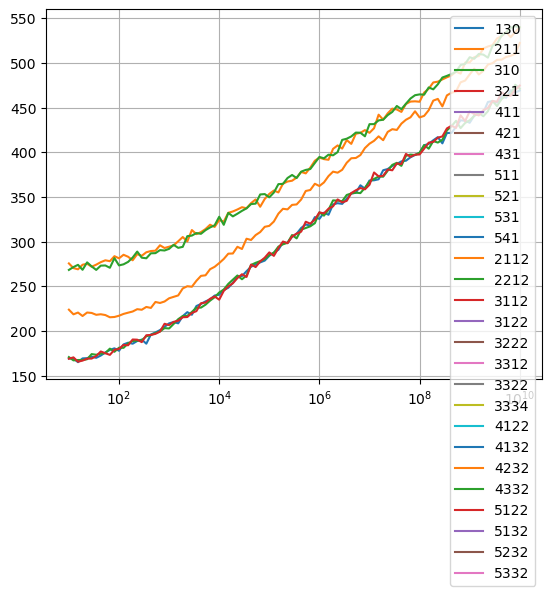

In [23]:

for i, pdg in enumerate(longer_pi0):
    if pdg in longer_pi0:
    # if pdg in [130, 211, 310, 2112, 2212]:
        plt.semilogx(energy_array, sigma_tab[i, :], label=longer_pi0[i])
# plt.semilogx(energy_array, sigma_tab[1, :], label=longer_pi0[0])
# plt.semilogx(energy_array, sigma_tab[2, :], label="oxigen")
plt.grid()
plt.legend()